In [3]:
!pip install tensorflow

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [13]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [14]:
X_test.shape

(10000, 32, 32, 3)

In [15]:
y_train.shape

(50000, 1)

In [16]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [18]:
y_test = y_test.reshape(-1,)

In [19]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [20]:
classes[9]

'truck'

In [21]:
def plot_sample(X, y, index):
    plt.figure(figsize =(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

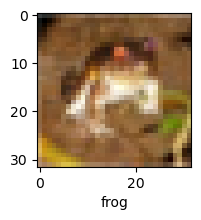

In [22]:
plot_sample(X_train, y_train, 0)

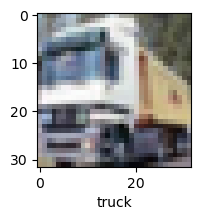

In [23]:
plot_sample(X_train, y_train, 1)

In [24]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1486/1563 [===========================>..] - ETA: 4s - loss: 1.8153 - accuracy: 0.3547

In [15]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 6s 17ms/step - loss: 1.4622 - accuracy: 0.4859


[1.4622219800949097, 0.48590001463890076]

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 15ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.51      0.57      1000
           1       0.71      0.41      0.52      1000
           2       0.35      0.42      0.38      1000
           3       0.32      0.43      0.37      1000
           4       0.53      0.27      0.36      1000
           5       0.44      0.31      0.37      1000
           6       0.45      0.67      0.54      1000
           7       0.53      0.58      0.55      1000
           8       0.69      0.57      0.62      1000
           9       0.47      0.69      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.48     10000
weighted avg       0.51      0.49      0.48     10000



In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 49s 31ms/step - loss: 1.4879 - accuracy: 0.4665
Epoch 2/5
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1471 - accuracy: 0.5985
Epoch 3/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0076 - accuracy: 0.6492
Epoch 4/5
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9245 - accuracy: 0.6804
Epoch 5/5
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8522 - accuracy: 0.7034


In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.79      0.69      1000
           1       0.77      0.81      0.79      1000
           2       0.43      0.66      0.52      1000
           3       0.49      0.53      0.51      1000
           4       0.63      0.59      0.61      1000
           5       0.67      0.41      0.51      1000
           6       0.76      0.76      0.76      1000
           7       0.79      0.70      0.74      1000
           8       0.86      0.63      0.73      1000
           9       0.79      0.70      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.68      0.66      0.66     10000
weighted avg       0.68      0.66      0.66     10000



In [22]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9854 - accuracy: 0.6580


[0.9854012727737427, 0.6579999923706055]

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [24]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 11ms/step


array([[1.84788909e-02, 4.52018197e-04, 1.58366844e-01, 5.65491796e-01,
        1.31406495e-03, 2.07038403e-01, 1.36532020e-02, 1.35633920e-03,
        3.25206928e-02, 1.32782129e-03],
       [1.84926540e-01, 2.53754526e-01, 9.56153730e-04, 7.74498949e-06,
        3.43957108e-05, 3.42070877e-07, 1.73223270e-06, 1.56049700e-05,
        5.59509039e-01, 7.93887477e-04],
       [2.91529242e-02, 6.83008194e-01, 1.18346438e-02, 4.84816078e-03,
        8.61456036e-04, 5.61158056e-04, 6.85946550e-04, 5.49348944e-04,
        2.57816225e-01, 1.06820585e-02],
       [8.18899214e-01, 3.39118913e-02, 8.03152099e-03, 1.24713511e-03,
        1.59433335e-02, 9.80516488e-05, 6.09618328e-05, 2.44237878e-03,
        1.19067974e-01, 2.97534250e-04],
       [2.77833715e-05, 1.17004158e-04, 2.50931960e-02, 2.85651740e-02,
        7.73538411e-01, 3.16233025e-03, 1.69340566e-01, 4.87145699e-05,
        8.73114841e-05, 1.95195589e-05]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [26]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

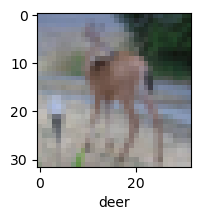

In [27]:
plot_sample(X_test, y_test,100)

In [28]:
classes[y_classes[100]]

'deer'